# Fundamentals of Risk and Returns

## Fundamentals of Returns

__Price Return__

$R_{t,t+1} = \frac{P_{t+1} - Pt}{P_t}$

_Example_: if you buy a stock at \$10 and sell it at \\$12  

$\frac{12 - 10}{10} = \frac{2}{10} = 0.2 = 20\%$

__Dividends__  

- A dividend is the distribution of some of a company's earnings to a class of its shareholders, as determined by the company's board of directors.
- Dividends are payments made by publicly-listed companies as a reward to investors for putting their money into the venture.
- Announcements of dividend payouts are generally accompanied by a proportional increase or decrease in a company's stock price.

__Total Return__  

$R_{t,t+1} = \frac{P_{t+1} + D_{t,t+1}}{P_t} - 1 = \frac{P_{t+1} + D_{t,t+1} - P_t}{P_t}$

The difference between the total return and the price return is the contribution of dividends. Most stock market index portfolios will contain stocks that generate dividends from time to time. Therefore, total returns over a period will almost always exceed the price returns.

For purpose of computing return or performance analysis, always use _total return_.  

__Multi Period Returns__

$R_{t,t+2} = (1 + R_{t,t+1})(1 + R_{t+1,t+2}) - 1$

_Ex:_ You buy a stock that returns 10% on the first day, then returns -3% on the second day  
$(1 + .10)(1 - .03) - 1 = 0.067 = 6.70\%$

__Annualizing Returns__  
The return you would get if the current return would continue for a year.
  
_Ex:_ the return over the month is 1%. What is the annualized return?  
$((1 + 0.01)^{12} - 1) = 12.68\%$

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [6]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

In [9]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.1,8.43,8.73], 
                      "ORANGE":[10.66,11.08,10.71,11.59,12.11]
                      })
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.10,10.71
3,8.43,11.59
4,8.73,12.11


In [10]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.10,10.71
3,8.43,11.59
4,8.73,12.11


In [11]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.10,10.71
3,8.43,11.59


In [12]:
prices.iloc[1:]/prices.iloc[:-1]

,BLUE,ORANGE
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,NaN


In [15]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.090909,-0.033394
2,0.040741,0.082166
3,0.035587,0.044866


In [16]:
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.10,10.71
4,8.43,11.59


In [17]:
prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.090909,-0.033394
3,0.040741,0.082166
4,0.035587,0.044866


In [19]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.090909,-0.033394
3,0.040741,0.082166
4,0.035587,0.044866


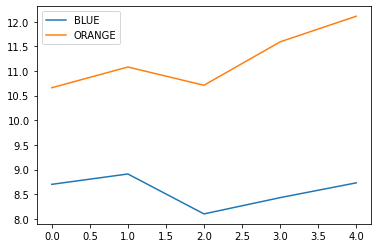

In [23]:
prices.plot()

In [29]:
returns = prices.pct_change()
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.090909,-0.033394
3,0.040741,0.082166
4,0.035587,0.044866


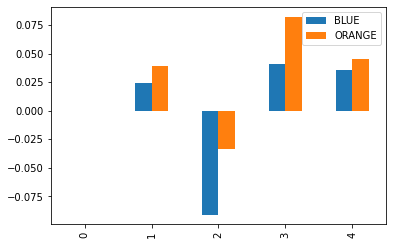

In [30]:
returns.plot.bar()

In [31]:
returns.std()

BLUE      0.062585
ORANGE    0.048328
dtype: float64

In [32]:
returns.mean()

BLUE      0.002389
ORANGE    0.033260
dtype: float64

In [33]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.024138,1.039400
2,0.909091,0.966606
3,1.040741,1.082166
4,1.035587,1.044866


In [34]:
np.prod(returns + 1)

BLUE      1.003448
ORANGE    1.136023
dtype: float64

In [35]:
(returns+1).prod() - 1

BLUE      0.003448
ORANGE    0.136023
dtype: float64

In [36]:
((returns+1).prod() - 1) * 100

BLUE       0.344828
ORANGE    13.602251
dtype: float64

## Annualization

In [37]:
rm = 0.01
((1 + rm)**12 - 1)

0.12682503013196977

In [38]:
rq = 0.04
(1 + rq)**4 - 1

0.1698585600000002

In [40]:
rd = 0.0001
(1 + rd)**252 - 1

0.025518911987694626

## Measures of Risk and Reward

### Volatility - Standard Deviation and Variance

__Annualizing Volatility__  
We can't compare the volatility from _daily data_ with the volatility from _monthly data_. 

$\sigma_{ann} = \sigma_p \sqrt{p}$  
there are approximately 252 _trading days_ per calendar year.  
  
The annualized volatility is always greater than the monthly volatility.  
  
_Example:_ The standard deviation of a stock's daily return series is .1%  
$.001  \sqrt{252} = 1.58\%$

__Risk Adjusted Measures__

we should look at its __excerss return__ _over the risk free rate_.  

$$RETURN\ ON\ RISK\ RATIO = \frac{RETURN}{VOLATILITY}$$
